oswaldo ordaz 14/09/23

# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [44]:
import numpy as np
# Datos extraidos de la página de quandl
costos = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

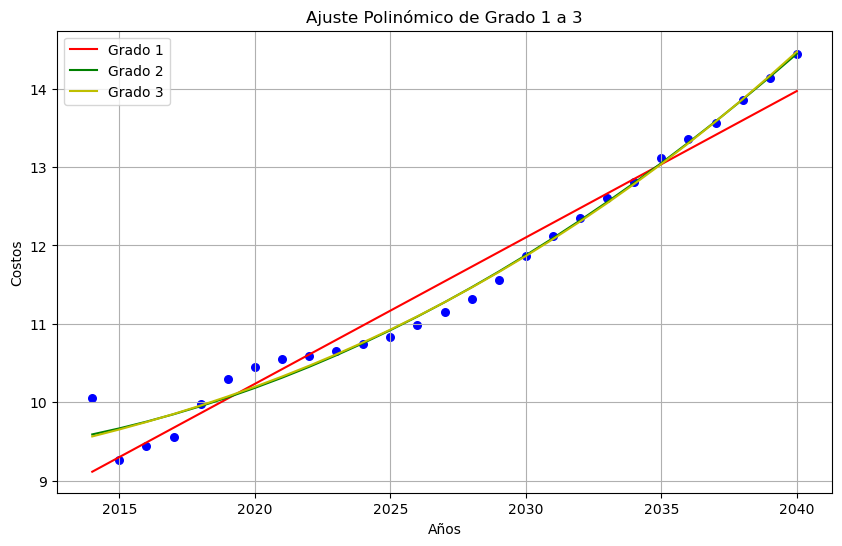

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

años = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040])

añosnum = (años - 2014) / (2040 - 2014) * 26


def polinomio_grado1(x, a, b):
    return a * x + b

def polinomio_grado2(x, a, b, c):
    return a * x**2 + b * x + c

def polinomio_grado3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


params1, covariance1 = curve_fit(polinomio_grado1, añosnum, costos)
params2, covariance2 = curve_fit(polinomio_grado2, añosnum, costos)
params3, covariance3 = curve_fit(polinomio_grado3, añosnum, costos)


prediccion1 = polinomio_grado1(añosnum, *params1)
prediccion2 = polinomio_grado2(añosnum, *params2)
prediccion3 = polinomio_grado3(añosnum, *params3)


plt.figure(figsize=(10, 6))
plt.scatter(años, costos, color='b', marker='o', s=30)
plt.plot(años, prediccion1, label='Grado 1', color='r')
plt.plot(años, prediccion2, label='Grado 2', color='g')
plt.plot(años, prediccion3, label='Grado 3', color='y')

plt.xlabel('Años')
plt.ylabel('Costos')
plt.title('Ajuste Polinómico de Grado 1 a 3')
plt.legend()
plt.grid(True)
plt.show()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [53]:
import pandas as pd
data = pd.read_excel("population_data.xlsx")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [62]:
Años = data['Year'].values
poblacion = data['Poblacion'].values
nacimientos = data['Nacimientos']

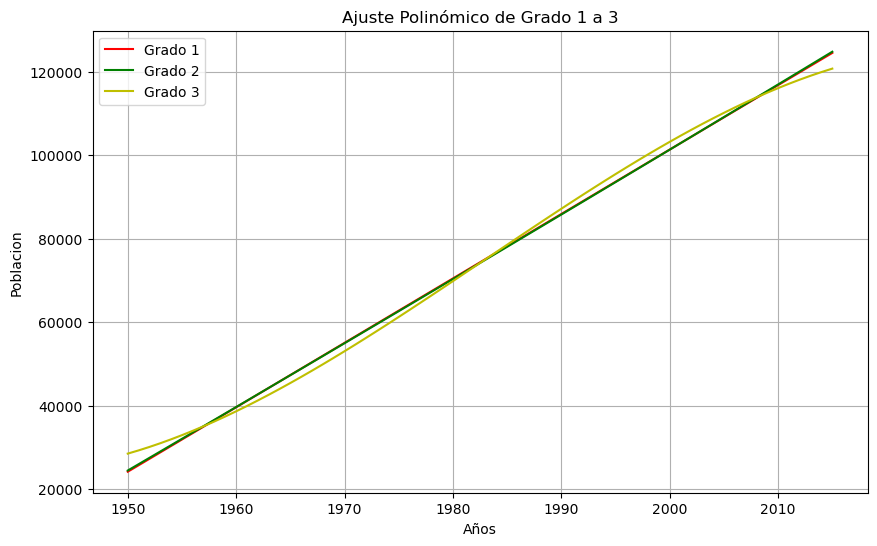

In [63]:
def polinomio_grado1(x, a, b):
    return a * x + b

def polinomio_grado2(x, a, b, c):
    return a * x**2 + b * x + c

def polinomio_grado3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


params1, covariance1 = curve_fit(polinomio_grado1, Años, poblacion)
params2, covariance2 = curve_fit(polinomio_grado2, Años, poblacion)
params3, covariance3 = curve_fit(polinomio_grado3, Años, poblacion)


prediccion1 = polinomio_grado1(Años, *params1)
prediccion2 = polinomio_grado2(Años, *params2)
prediccion3 = polinomio_grado3(Años, *params3)


plt.figure(figsize=(10, 6))
plt.plot(Años, prediccion1, label='Grado 1', color='r')
plt.plot(Años, prediccion2, label='Grado 2', color='g')
plt.plot(Años, prediccion3, label='Grado 3', color='y')

plt.xlabel('Años')
plt.ylabel('Poblacion')
plt.title('Ajuste Polinómico de Grado 1 a 3')
plt.legend()
plt.grid(True)
plt.show()

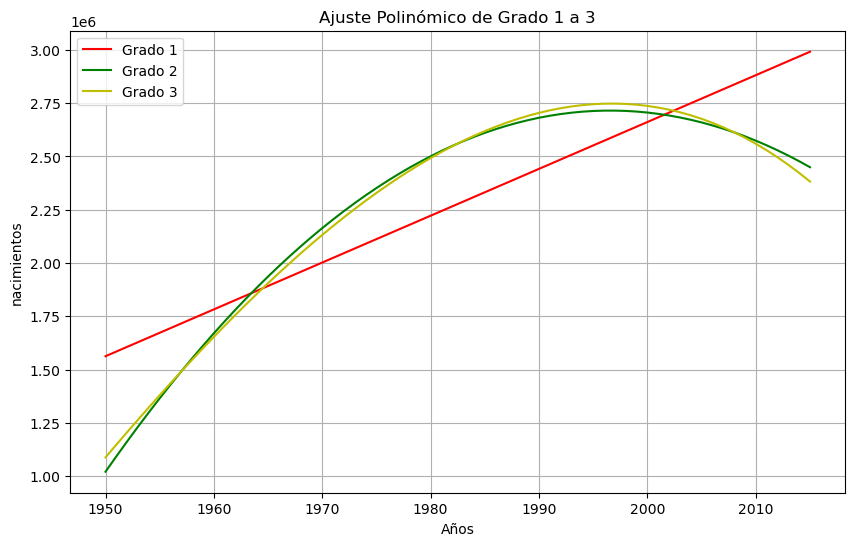

In [64]:
def polinomio_grado1(x, a, b):
    return a * x + b

def polinomio_grado2(x, a, b, c):
    return a * x**2 + b * x + c

def polinomio_grado3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


params1, covariance1 = curve_fit(polinomio_grado1, Años, nacimientos)
params2, covariance2 = curve_fit(polinomio_grado2, Años, nacimientos)
params3, covariance3 = curve_fit(polinomio_grado3, Años, nacimientos)


prediccion1 = polinomio_grado1(Años, *params1)
prediccion2 = polinomio_grado2(Años, *params2)
prediccion3 = polinomio_grado3(Años, *params3)


plt.figure(figsize=(10, 6))
plt.plot(Años, prediccion1, label='Grado 1', color='r')
plt.plot(Años, prediccion2, label='Grado 2', color='g')
plt.plot(Años, prediccion3, label='Grado 3', color='y')

plt.xlabel('Años')
plt.ylabel('nacimientos')
plt.title('Ajuste Polinómico de Grado 1 a 3')
plt.legend()
plt.grid(True)
plt.show()

ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.

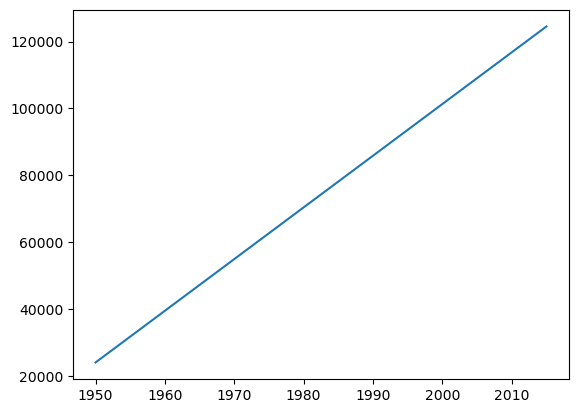

In [35]:
grados = [1, 2, 3]
modelos = {}

for grado in grados:
    # Crear instancias de PolynomialFeatures y LinearRegression
    poly = PolynomialFeatures(degree = grado)
    X_poly = poly.fit_transform(Años.reshape(-1, 1))
    modelo = LinearRegression()
    modelo.fit(X_poly, poblacion)
    
    poblacion_pred = model.predict(X_poly)
    plt.plot(Años, poblacion_pred, label=f'Grado {grado}')
    
    if grado == 1:
        X_poly_simple = X_poly[:, 1:]

plt.xlabel('Años')
plt.ylabel('poblacion')
plt.legend()
plt.show()


In [37]:
Años = data['Year'].values
Nacimientos = data['Nacimientos'].values

ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.

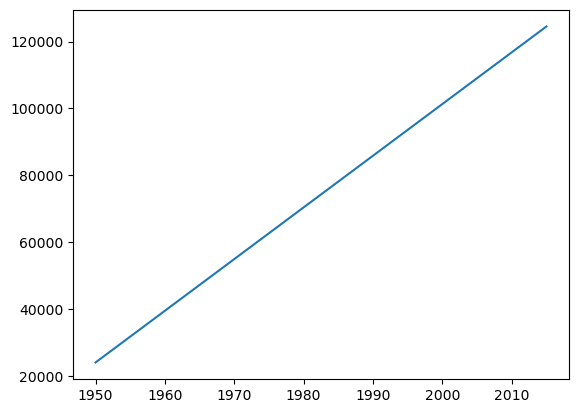

In [38]:
grados = [1, 2, 3]
modelos = {}

for grado in grados:
    # Crear instancias de PolynomialFeatures y LinearRegression
    poly = PolynomialFeatures(degree = grado)
    X_poly = poly.fit_transform(Años.reshape(-1, 1))
    modelo = LinearRegression()
    modelo.fit(X_poly, Nacimientos)
    
    Nacimientos_pred = model.predict(X_poly)
    plt.plot(Años, Nacimientos_pred, label=f'Grado {grado}')
    
    if grado == 1:
        X_poly_simple = X_poly[:, 1:]

plt.xlabel('Años')
plt.ylabel('Nacimientos')
plt.legend()
plt.show()